# Bike Sharing Demand

## 1.Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# from catboost import CatBoostRegressor
# from catboost import CatBoostClassifier

## 2.Работа с данными

### 2.1 Загрузка данных

In [50]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

submission = pd.read_csv('data/sampleSubmission.csv')

### 2.2 Изучение и анализ данных

In [51]:
data_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
data_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [53]:
data_train.drop(['casual', 'registered'], axis=1, inplace=True)

In [54]:
data_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


#### Исследование на пропуски

In [55]:
data_train.isnull().sum().sort_values(ascending=False)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

#### Общее исследование

In [56]:
data_train['datetime'] = pd.to_datetime(data_train['datetime'])
data_test['datetime'] = pd.to_datetime(data_test['datetime'])

In [57]:
data_train['year'] = data_train['datetime'].dt.year
data_train['month'] = data_train['datetime'].dt.month_name()
data_train['day'] = data_train['datetime'].dt.day_name()
data_train['hour'] = data_train['datetime'].dt.hour
data_train.drop('datetime', axis=1, inplace=True)

data_test['year'] = data_test['datetime'].dt.year
data_test['month'] = data_test['datetime'].dt.month_name()
data_test['day'] = data_test['datetime'].dt.day_name()
data_test['hour'] = data_test['datetime'].dt.hour
data_test.drop('datetime', axis=1, inplace=True)

data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,January,Saturday,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,January,Saturday,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,January,Saturday,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,January,Saturday,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,January,Saturday,4


In [58]:
data_train['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
data_train['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)
data_train['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)
data_train['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

data_test['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
data_test['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)
data_test['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)
data_test['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,16,2011,January,Saturday,0
1,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,40,2011,January,Saturday,1
2,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,32,2011,January,Saturday,2
3,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,13,2011,January,Saturday,3
4,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,1,2011,January,Saturday,4


In [59]:
cat_cols = ['season',
            'holiday', 
            'workingday',
            'weather',
            'year', 
            'month', 
            'day', 
            'hour'
]

target = ['count']

In [60]:
data_train['humidity'].min()

0

In [61]:
data_train[data_train['humidity'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
1091,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,3,2011,March,Thursday,0
1092,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,2,2011,March,Thursday,1
1093,Spring,Not Holiday,Workingday,Rain,13.94,15.910,0,16.9979,1,2011,March,Thursday,2
1094,Spring,Not Holiday,Workingday,Rain,14.76,17.425,0,12.9980,3,2011,March,Thursday,5
1095,Spring,Not Holiday,Workingday,Rain,14.76,16.665,0,22.0028,12,2011,March,Thursday,6
1096,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,15.0013,37,2011,March,Thursday,7
1097,Spring,Not Holiday,Workingday,Rain,15.58,19.695,0,19.0012,44,2011,March,Thursday,8
1098,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,15.0013,24,2011,March,Thursday,9
1099,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,11.0014,17,2011,March,Thursday,10
1100,Spring,Not Holiday,Workingday,Rain,16.40,20.455,0,16.9979,11,2011,March,Thursday,11


In [62]:
mean_humidity = data_train['humidity'].mean()

data_train['humidity'] = data_train['humidity'].replace(0, mean_humidity)
data_test['humidity'] = data_test['humidity'].replace(0, mean_humidity)

data_train['humidity'].min()

8.0

In [63]:
data_train['windspeed'].min()

0.0

In [64]:
data_train[data_train['windspeed'] == 0]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81.0,0.0,16,2011,January,Saturday,0
1,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,0.0,40,2011,January,Saturday,1
2,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,0.0,32,2011,January,Saturday,2
3,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,0.0,13,2011,January,Saturday,3
4,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,0.0,1,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,Winter,Not Holiday,Workingday,Mist,16.40,20.455,87.0,0.0,232,2012,December,Monday,12
10829,Winter,Not Holiday,Workingday,Mist,17.22,21.210,88.0,0.0,211,2012,December,Monday,15
10846,Winter,Not Holiday,Workingday,Clear,15.58,19.695,94.0,0.0,662,2012,December,Tuesday,8
10860,Winter,Not Holiday,Workingday,Clear,13.94,16.665,49.0,0.0,132,2012,December,Tuesday,22


In [65]:
mean_humidity = data_train['windspeed'].mean()

data_train['windspeed'] = data_train['windspeed'].replace(0, mean_humidity)
data_test['windspeed'] = data_test['windspeed'].replace(0, mean_humidity)

data_train['windspeed'].min()

6.0032

<AxesSubplot:>

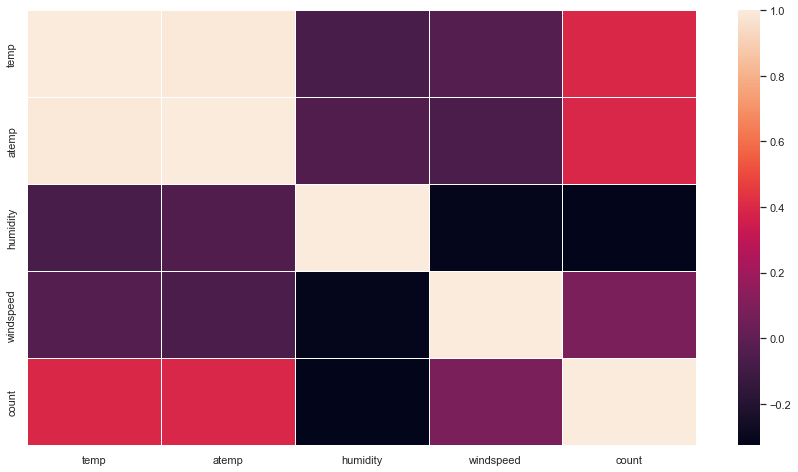

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr(), linewidth=.5)

Присутствует явная зависимость между atemp и temp, поэтому один из них удалим.

In [67]:
data_train.drop('atemp', axis=1, inplace = True)
data_test.drop('atemp', axis=1, inplace = True)

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

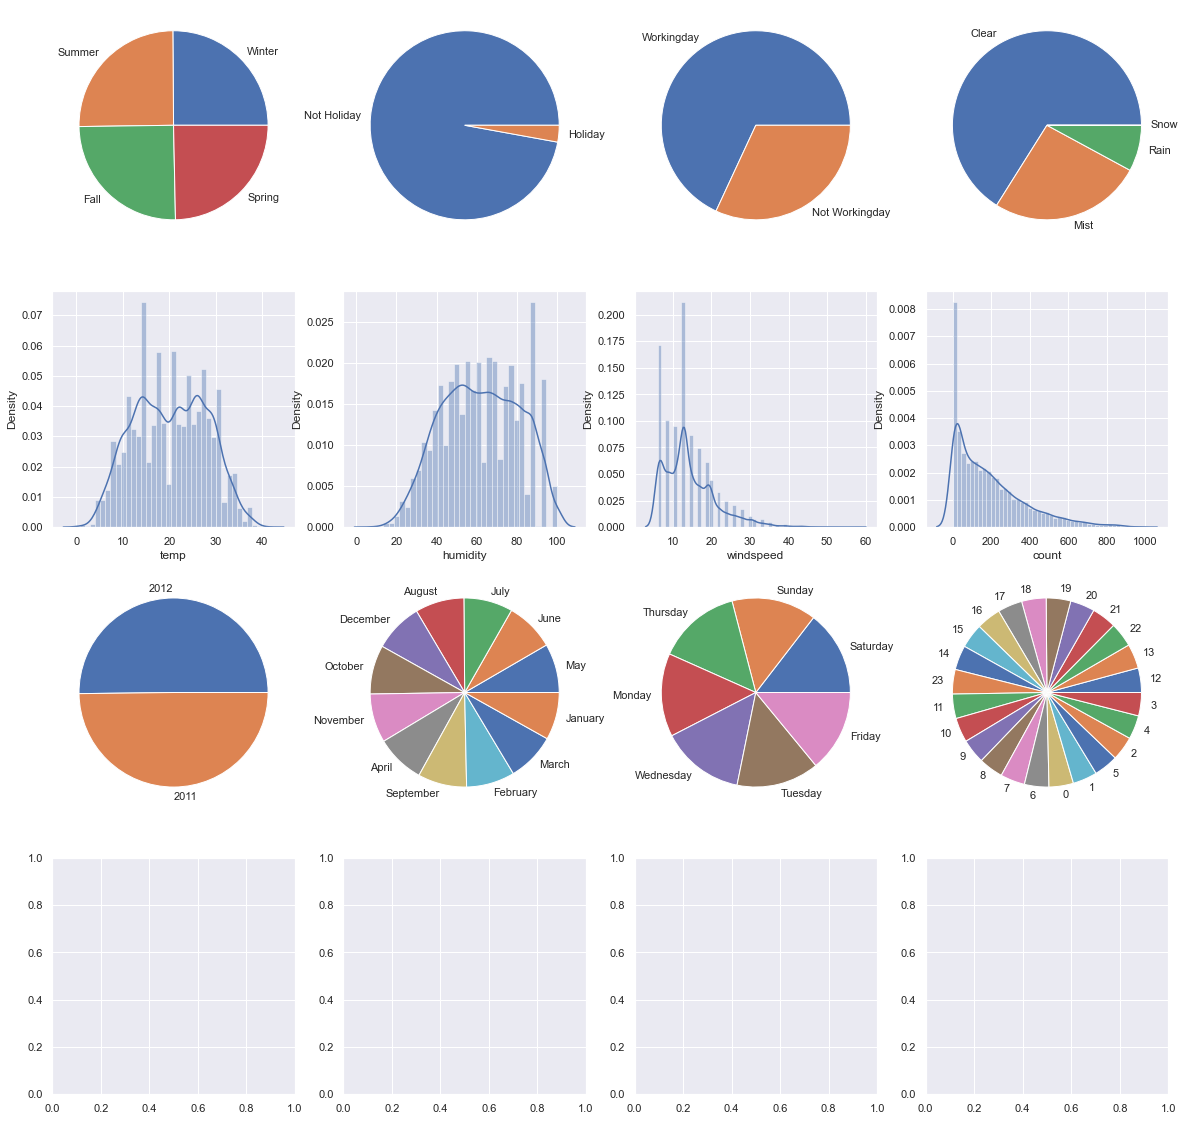

In [68]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
colors = sns.color_palette('pastel')[0:5]
for ax, col in zip(axes.flatten(), data_train.columns):
    if col in cat_cols:
        ax.pie(data_train[col].value_counts(), labels=data_train[col].value_counts().index)
    else:
        sns.distplot(data_train[col], ax=ax)

In [69]:
data_train

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour
0,Spring,Not Holiday,Not Workingday,Clear,9.84,81.0,12.799395,16,2011,January,Saturday,0
1,Spring,Not Holiday,Not Workingday,Clear,9.02,80.0,12.799395,40,2011,January,Saturday,1
2,Spring,Not Holiday,Not Workingday,Clear,9.02,80.0,12.799395,32,2011,January,Saturday,2
3,Spring,Not Holiday,Not Workingday,Clear,9.84,75.0,12.799395,13,2011,January,Saturday,3
4,Spring,Not Holiday,Not Workingday,Clear,9.84,75.0,12.799395,1,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,Not Holiday,Workingday,Clear,15.58,50.0,26.002700,336,2012,December,Wednesday,19
10882,Winter,Not Holiday,Workingday,Clear,14.76,57.0,15.001300,241,2012,December,Wednesday,20
10883,Winter,Not Holiday,Workingday,Clear,13.94,61.0,15.001300,168,2012,December,Wednesday,21
10884,Winter,Not Holiday,Workingday,Clear,13.94,61.0,6.003200,129,2012,December,Wednesday,22


In [70]:
data_test

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,Spring,Not Holiday,Workingday,Clear,10.66,56,26.002700,2011,January,Thursday,0
1,Spring,Not Holiday,Workingday,Clear,10.66,56,12.799395,2011,January,Thursday,1
2,Spring,Not Holiday,Workingday,Clear,10.66,56,12.799395,2011,January,Thursday,2
3,Spring,Not Holiday,Workingday,Clear,10.66,56,11.001400,2011,January,Thursday,3
4,Spring,Not Holiday,Workingday,Clear,10.66,56,11.001400,2011,January,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,Spring,Not Holiday,Workingday,Mist,10.66,60,11.001400,2012,December,Monday,19
6489,Spring,Not Holiday,Workingday,Mist,10.66,60,11.001400,2012,December,Monday,20
6490,Spring,Not Holiday,Workingday,Clear,10.66,60,11.001400,2012,December,Monday,21
6491,Spring,Not Holiday,Workingday,Clear,10.66,56,8.998100,2012,December,Monday,22


In [71]:
# One hot Endocing .
data_train = pd.get_dummies(data_train, columns=['season', 'weather', 'month', 'day'])
data_test = pd.get_dummies(data_test, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    data_train[i] = label_encoder.fit_transform(data_train[i])
    data_test[i] = label_encoder.transform(data_test[i])
    

In [ ]:
columns_to_scale = ['temp', 'humidity', 'windspeed', 'hour']

scaler = StandardScaler()

scaler.fit(data_train[columns_to_scale])

data_train[columns_to_scale] = scaler.transform(data_train[columns_to_scale])
data_test[columns_to_scale] = scaler.transform(data_test[columns_to_scale])

In [72]:
X = data_train.drop(target, axis=1)
y = data_train[target]

## 3.Построение модели

In [73]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.clip(y_pred, 0, None)))

rmsle_scorer = make_scorer(rmsle)

### 3.1 Linear Regression

In [82]:
regressor = Ridge()


PARAMS = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]
        }
                    
grid_search = GridSearchCV(
    estimator = regressor,
    param_grid=PARAMS,
    scoring=rmsle_scorer,
    n_jobs=-1,
    cv=10
)

lr = LinearRegression()

linear_reg = grid_search.fit(X, y)

In [83]:
print(f"best score: {linear_reg.best_score_}")
print(f"best params: {linear_reg.best_params_}")

best score: 1.3169431620298027
best params: {'alpha': 0.0001}


In [84]:
submission["count"] = linear_reg.predict(data_test)
submission["count"] = submission["count"].apply(lambda x: 0 if x<0 else x)
submission.to_csv("Submissions/linear_reg.csv", index=False)

### 3.2 Random Forest

In [86]:
regr = RandomForestRegressor(random_state=42)

PARAMS = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,3,5,7,9,10,12,14,15,17,20]
}

# regr = RandomForestClassifier(random_state=42, max_depth=17, n_estimators=200)
grid_search = GridSearchCV(regr, PARAMS, scoring="neg_root_mean_squared_error", cv=5)
rf = grid_search.fit(X, y.values.ravel())

In [88]:
submission["count"] = rf.predict(data_test)
submission["count"] = submission["count"].apply(lambda x: 0 if x<0 else x)
submission.to_csv("Submissions/rf.csv", index=False)

In [87]:
print(f"best score: {rf.best_score_}")
print(f"best params: {rf.best_params_}")

best score: -74.22668803922053
best params: {'max_depth': 17, 'n_estimators': 200}


## 4.Вывод

Лучшее решение дал алгоритм случайного леса

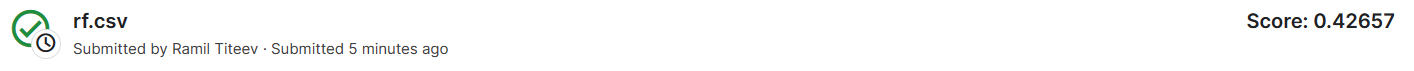